In [1]:
import pandas as pd
df1 = pd.read_csv('ahs-mort-rajasthan-jhunjhunun.csv')
df2 = pd.read_csv('ahs-mort-rajasthan-sirohi.csv')
df3 = pd.read_csv('ahs-mort-rajasthan-alwar.csv')
df4 = pd.read_csv('ahs-mort-rajasthan-dhaulpur.csv')
df5 = pd.read_csv('ahs-mort-rajasthan-bikaner.csv')
df6 = pd.read_csv('ahs-mort-rajasthan-jhalawar.csv')
df7 = pd.read_csv('ahs-mort-rajasthan-jodhpur.csv')
df8 = pd.read_csv('ahs-mort-rajasthan-jaipur.csv')
df9 = pd.read_csv('ahs-mort-rajasthan-jaisalmer.csv')
df10 = pd.read_csv('ahs-mort-rajasthan-kota.csv')
df11 = pd.read_csv('ahs-mort-rajasthan-sikar.csv')
df12 = pd.read_csv('ahs-mort-rajasthan-tonk.csv')
df13 = pd.read_csv('ahs-mort-rajasthan-udaipur.csv') 

In [2]:
frames = [df1, df2 ,df3, df4 ,df5, df6 ,df7, df8,df9,df10,df11,df12,df13]
df = pd.concat(frames)

In [3]:
df.shape

(23365, 119)

In [4]:
df = df [['state','district','deceased_sex','age','treatment_source','month_of_death','year_of_death','death_symptoms','is_death_associated_with_preg'
            ,'marital_status','highest_qualification','drinking_water_source','toilet_used']]

In [5]:
len(df.columns)

13

In [6]:
df

,state,district,deceased_sex,age,treatment_source,month_of_death,year_of_death,death_symptoms,is_death_associated_with_preg,marital_status,highest_qualification,drinking_water_source,toilet_used
0,RAJASTHAN,JHUNJHUNUN,Male,32.0,Government Hospital,7,2011,NaN,NaN,Widow/Widower,Illiterate,Piped water into dwelling/yard/plot,Pit latrine(without flush/ pour flush):-Ventil...
1,RAJASTHAN,JHUNJHUNUN,Male,62.0,No Medical attention,4,2011,NaN,NaN,Married but Gauna not performed,Illiterate,Piped water into dwelling/yard/plot,To pit latrine
2,RAJASTHAN,JHUNJHUNUN,Male,39.0,Private Hospital,10,2011,NaN,NaN,Married and Gauna performed,Literate With formal education-Secondary/Matri...,NaN,NaN
3,RAJASTHAN,JHUNJHUNUN,Male,37.0,No Medical attention,12,2011,NaN,NaN,Married and Gauna performed,Literate With formal education-Primary,Piped water into dwelling/yard/plot,To septic tank
4,RAJASTHAN,JHUNJHUNUN,Female,62.0,Government Hospital,2,2011,NaN,NaN,Married and Gauna performed,Literate With formal education-Primary,Piped water into dwelling/yard/plot,To septic tank
5,RAJASTHAN,JHUNJHUNUN,Male,27.0,Government Hospital,12,2011,NaN,NaN,Married and Gauna performed,Literate With formal education-Below primary,Piped water into dwelling/yard/plot,Flush/Pour flush latrine connected:-To piped s...
6,RAJASTHAN,JHUNJHUNUN,Male,42.0,No Medical attention,6,2011,NaN,NaN,Married and Gauna performed,Literate With formal education-Below primary,Piped water into dwelling/yard/plot,Pit latrine(without flush/ pour flush):-Ventil...
7,RAJASTHAN,JHUNJHUNUN,Male,52.0,Private Hospital,11,2011,NaN,NaN,Widow/Widower,Illiterate,Piped water into dwelling/yard/plot,To pit latrine
8,RAJASTHAN,JHUNJHUNUN,Male,42.0,Private Hospital,12,2011,NaN,NaN,Married and Gauna performed,Illiterate,Piped water into dwelling/yard/plot,Pit latrine(without flush/ pour flush):-Ventil...
9,RAJASTHAN,JHUNJHUNUN,Male,65.0,Private Hospital,9,2011,Congenital/birth defects,NaN,Married and Gauna performed,Illiterate,Piped water into dwelling/yard/plot,To pit latrine


In [7]:
df.to_csv('data.csv')

In [8]:
import findspark
findspark.init('/usr/local/spark')
from pyspark.sql import SparkSession
spark = SparkSession.builder.appName('proj').getOrCreate()

In [9]:
import seaborn as sns
import matplotlib.pyplot as plt

In [10]:
data = spark.read.format('csv').load('data.csv',header=True,inferSchema=True)

In [11]:
df.corr()

,age,month_of_death,year_of_death
age,1.000000,0.020781,0.043563
month_of_death,0.020781,1.000000,0.023837
year_of_death,0.043563,0.023837,1.000000


In [12]:
df.columns

Index(['state', 'district', 'deceased_sex', 'age', 'treatment_source',
       'month_of_death', 'year_of_death', 'death_symptoms',
       'is_death_associated_with_preg', 'marital_status',
       'highest_qualification', 'drinking_water_source', 'toilet_used'],
      dtype='object')

In [13]:
df["marital_status"].fillna("null", inplace = True)
df["treatment_source"].fillna("null", inplace = True)
df["highest_qualification"].fillna("null", inplace = True)
df["drinking_water_source"].fillna("null", inplace = True)
df["toilet_used"].fillna("null", inplace = True)
df["death_symptoms"].fillna("null", inplace = True)
df["is_death_associated_with_preg"].fillna("null", inplace = True)
df["age"].fillna(value=0, inplace = True)

In [14]:
df.state.unique()

array(['RAJASTHAN'], dtype=object)

In [15]:
state={'RAJASTHAN':1}
district = {'JHUNJHUNUN':1, 'SIROHI':2, 'ALWAR':3, 'DHAULPUR':4, 'BIKANER':5, 'JHALAWAR':6,
       'JODHPUR':7, 'JAIPUR':8, 'JAISALMER':9, 'KOTA':10, 'SIKAR':11, 'TONK':12,
       'UDAIPUR':13}
deceased_sex = {'Female':1,'Male':2}
treatment_source={'Private Hospital':1,'Government Hospital':2,
                  'No Medical attention':3,'Private Dispensary/Clinic':4,
                  'Government PHC':5,'At Home':6,'Others':7,
                  'Private AYUSH Hospital/Clinic':8,'NGO or Trust Hosp/Clinic':9,
                  'Government CHC':10,'Government UHC/UHP/UFWC':11,
                  'Government Sub Center':12,'Government Dispensary/Clinic':13
                 ,'Government AYUSH Hospital/Clinic':14,'null':0,'19':7,'45':7,'14':7,'55':7}
marital_status = {'Married and Gauna performed':1, 'Widow/Widower':2, 'Never married':3, 'Separated':4, 
                  'Married but Gauna not performed':5, 'Remarried':6,
       'Not stated':7, 'Divorced':8,'null':0}
highest_qualification={'Literate With formal education-Post Grad/ M.Tech/M.B.A/ MD/Equivalent or higher':1,
                       'Literate with formal education-Graduate/B.Tech/B.B.A/MBBS/Equivalent':2,
                       'Literate With formal education-Middle':3,
                       'Literate With formal education-Secondary/Matric (Class-X)':4,
                       'Literate With formal education-Below primary':5,
                       'Literate Without formal education':6,'Literate With formal education-Primary':7,
                       'null':0,'Literate With formal education-Hr. Secondary/Sr. Secondary/Pre-university (Class XII)':8
                       ,'Illiterate':9,
                       'Literate With formal education-Non-technical/Technical diploma or certificate not equivalent to a degree':10}
drinking_water_source={'Piped water into dwelling/yard/plot':1,'Public tap/standpipe':2,'Tube well or Borehole':3, 
                           'Hand pump':4, 'Unprotected dug well':5,
       'Tanker /truck/Cart with Surface watersmall tank':6, 'Surface water':7,
       'other sources':8, 'Protected dug well':9,'null':0}
toilet_used={'Flush/Pour flush latrine connected:-To piped sewer system':1,
       'open defecation(field, brush,jungle etc.)':2, 'To septic tank':3,
       'Pit latrine with slab':4, 'To pit latrine':5, 'To somewhere else':6,
       'community toilet':7,
       'Pit latrine(without flush/ pour flush):-Ventilated Improved Pit(VIP)':8,
       'Open pit /Pit latrine without slab':9,'service latrine':10,'null':0}
death_symptoms ={'Hypothermia':1, 'Fever with Jaundice':2, 'Others':3, 'Infections':4,
       'Preterm birth/ Low birth weight baby not thriving':5,
       'Bleeding from umbilicus & elsewhere':6,
       'Convulsions soon after birth':7, 'Diarrhoea / Dysentery':8,
       'Asphyxia':9, 'Fever with rash':10, 'Birth injuries':11,
       'Respiratory Infection':12, 'Fever with convulsions':13, 'Jaundice':14,
       'Congenital/birth defects':15,'null':0}
is_death_associated_with_preg = {'No':2, 'null':0, '0':0, 'Yes':1}

In [16]:
df.state = [state[item] for item in df.state]

In [17]:
df.district = [district[item] for item in df.district]

In [18]:
df.deceased_sex = [deceased_sex[item] for item in df.deceased_sex]


In [19]:
df.treatment_source = [treatment_source[item] for item in df.treatment_source]
df.marital_status = [marital_status[item] for item in df.marital_status]


In [20]:
    df.drinking_water_source = [drinking_water_source[item] for item in df.drinking_water_source]
    df.toilet_used = [toilet_used[item] for item in df.toilet_used]
    df.highest_qualification = [highest_qualification[item] for item in df.highest_qualification]
    df.death_symptoms = [death_symptoms[item] for item in df.death_symptoms]
    df.is_death_associated_with_preg = [is_death_associated_with_preg[item] for item in df.is_death_associated_with_preg]

In [21]:
df.head()

,state,district,deceased_sex,age,treatment_source,month_of_death,year_of_death,death_symptoms,is_death_associated_with_preg,marital_status,highest_qualification,drinking_water_source,toilet_used
0,1,1,2,32.0,2,7,2011,0,0,2,9,1,8
1,1,1,2,62.0,3,4,2011,0,0,5,9,1,5
2,1,1,2,39.0,1,10,2011,0,0,1,4,0,0
3,1,1,2,37.0,3,12,2011,0,0,1,7,1,3
4,1,1,1,62.0,2,2,2011,0,0,1,7,1,3


In [22]:
df.columns

Index(['state', 'district', 'deceased_sex', 'age', 'treatment_source',
       'month_of_death', 'year_of_death', 'death_symptoms',
       'is_death_associated_with_preg', 'marital_status',
       'highest_qualification', 'drinking_water_source', 'toilet_used'],
      dtype='object')

In [23]:
df.dropna(inplace=True)

In [24]:
df

,state,district,deceased_sex,age,treatment_source,month_of_death,year_of_death,death_symptoms,is_death_associated_with_preg,marital_status,highest_qualification,drinking_water_source,toilet_used
0,1,1,2,32.0,2,7,2011,0,0,2,9,1,8
1,1,1,2,62.0,3,4,2011,0,0,5,9,1,5
2,1,1,2,39.0,1,10,2011,0,0,1,4,0,0
3,1,1,2,37.0,3,12,2011,0,0,1,7,1,3
4,1,1,1,62.0,2,2,2011,0,0,1,7,1,3
5,1,1,2,27.0,2,12,2011,0,0,1,5,1,1
6,1,1,2,42.0,3,6,2011,0,0,1,5,1,8
7,1,1,2,52.0,1,11,2011,0,0,2,9,1,5
8,1,1,2,42.0,1,12,2011,0,0,1,9,1,8
9,1,1,2,65.0,1,9,2011,15,0,1,9,1,5


In [25]:
df.dtypes

state                              int64
district                           int64
deceased_sex                       int64
age                              float64
treatment_source                   int64
month_of_death                     int64
year_of_death                      int64
death_symptoms                     int64
is_death_associated_with_preg      int64
marital_status                     int64
highest_qualification              int64
drinking_water_source              int64
toilet_used                        int64
dtype: object

In [26]:
tc = df.corr()

In [27]:
tc

,state,district,deceased_sex,age,treatment_source,month_of_death,year_of_death,death_symptoms,is_death_associated_with_preg,marital_status,highest_qualification,drinking_water_source,toilet_used
state,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
district,NaN,1.000000,-0.007771,-0.021704,0.027690,-0.013929,-0.011807,-0.050033,-0.012632,-0.029765,-0.011234,0.066986,-0.174031
deceased_sex,NaN,-0.007771,1.000000,-0.014982,-0.022090,-0.010542,0.003029,-0.059320,-0.318347,0.039048,0.050031,-0.004824,0.003523
age,NaN,-0.021704,-0.014982,1.000000,-0.055730,0.017401,-0.050558,-0.050322,0.028737,0.198805,0.359001,0.090794,0.209446
treatment_source,NaN,0.027690,-0.022090,-0.055730,1.000000,-0.011033,0.037392,0.065111,-0.033796,-0.039516,-0.010354,0.021506,-0.068707
month_of_death,NaN,-0.013929,-0.010542,0.017401,-0.011033,1.000000,0.023837,-0.002174,0.006362,-0.001918,-0.002874,-0.009979,0.006237
year_of_death,NaN,-0.011807,0.003029,-0.050558,0.037392,0.023837,1.000000,0.027852,-0.024412,-0.018552,-0.056615,-0.113682,-0.097108
death_symptoms,NaN,-0.050033,-0.059320,-0.050322,0.065111,-0.002174,0.027852,1.000000,-0.103683,-0.058417,0.011310,0.026144,-0.027305
is_death_associated_with_preg,NaN,-0.012632,-0.318347,0.028737,-0.033796,0.006362,-0.024412,-0.103683,1.000000,0.093877,0.014784,0.025445,0.020794
marital_status,NaN,-0.029765,0.039048,0.198805,-0.039516,-0.001918,-0.018552,-0.058417,0.093877,1.000000,0.223604,0.084453,0.075957


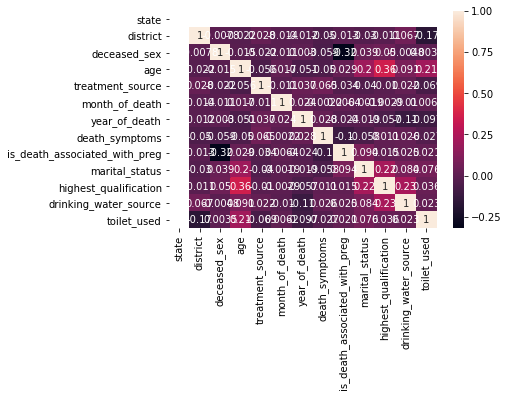

In [28]:
sns.heatmap(tc,annot=True) 

In [29]:
df['age'] = pd.to_numeric(df['age']) #death_symptoms,is_death_associated_with_preg,highest_qualification

In [30]:
df.toilet_used.unique()

array([ 8,  5,  0,  3,  1,  2,  4,  6,  9, 10,  7])

In [31]:
featureColumns =[
     'state', 'district', 'deceased_sex', 'treatment_source',
       'month_of_death', 'year_of_death', 'marital_status',
       'highest_qualification', 'drinking_water_source', 'toilet_used'
]

In [32]:
ff=[
    'state', 'district', 'age', 'treatment_source',
       'month_of_death', 'year_of_death', 'death_symptoms',
       'is_death_associated_with_preg', 'marital_status',
               'highest_qualification', 'drinking_water_source', 'toilet_used'
]

In [33]:
df.to_csv('numdata.csv') 

In [34]:
data = spark.read.format('csv').load('numdata.csv',header=True,inferSchema=True)

In [35]:
train_data,test_data =data.randomSplit([0.7,0.3])

In [36]:
from pyspark.ml.classification import DecisionTreeClassifier
from pyspark.ml.feature import VectorIndexer,VectorAssembler
from pyspark.ml.evaluation import MulticlassClassificationEvaluator

In [37]:
from pyspark.ml.regression import DecisionTreeRegressor
from pyspark.ml import Pipeline

In [38]:
assembler = VectorAssembler(inputCols=featureColumns,outputCol="features")

In [78]:
assembler1 = VectorAssembler(inputCols=ff,outputCol="features")

In [40]:
assembled = assembler.transform(data)

In [79]:
assembled1 = assembler1.transform(data)

In [42]:
assembled.printSchema()

root
 |-- _c0: integer (nullable = true)
 |-- state: integer (nullable = true)
 |-- district: integer (nullable = true)
 |-- deceased_sex: integer (nullable = true)
 |-- age: double (nullable = true)
 |-- treatment_source: integer (nullable = true)
 |-- month_of_death: integer (nullable = true)
 |-- year_of_death: integer (nullable = true)
 |-- death_symptoms: integer (nullable = true)
 |-- is_death_associated_with_preg: integer (nullable = true)
 |-- marital_status: integer (nullable = true)
 |-- highest_qualification: integer (nullable = true)
 |-- drinking_water_source: integer (nullable = true)
 |-- toilet_used: integer (nullable = true)
 |-- features: vector (nullable = true)



In [89]:
assembled1.printSchema()

root
 |-- _c0: integer (nullable = true)
 |-- state: integer (nullable = true)
 |-- district: integer (nullable = true)
 |-- deceased_sex: integer (nullable = true)
 |-- age: double (nullable = true)
 |-- treatment_source: integer (nullable = true)
 |-- month_of_death: integer (nullable = true)
 |-- year_of_death: integer (nullable = true)
 |-- death_symptoms: integer (nullable = true)
 |-- is_death_associated_with_preg: integer (nullable = true)
 |-- marital_status: integer (nullable = true)
 |-- highest_qualification: integer (nullable = true)
 |-- drinking_water_source: integer (nullable = true)
 |-- toilet_used: integer (nullable = true)
 |-- features: vector (nullable = true)



In [90]:
assembled1.head()

Row(_c0=0, state=1, district=1, deceased_sex=2, age=32.0, treatment_source=2, month_of_death=7, year_of_death=2011, death_symptoms=0, is_death_associated_with_preg=0, marital_status=2, highest_qualification=9, drinking_water_source=1, toilet_used=8, features=DenseVector([1.0, 1.0, 32.0, 2.0, 7.0, 2011.0, 0.0, 0.0, 2.0, 9.0, 1.0, 8.0]))

In [44]:
(trainingData,testData) = assembled.randomSplit([0.8,0.2],seed = 13234)

In [81]:
(trainingData1,testData1) = assembled1.randomSplit([0.8,0.2],seed = 13234)

In [46]:
trainingData.count(),testData.count()

(18639, 4726)

In [47]:
dt = DecisionTreeClassifier(labelCol="age",featuresCol="features",maxDepth=5,minInstancesPerNode=25)

In [82]:
dt1 = DecisionTreeClassifier(labelCol="deceased_sex",featuresCol="features",maxDepth=5,minInstancesPerNode=25)

In [49]:
pipeline = Pipeline(stages=[dt])
model = pipeline.fit(trainingData)

In [97]:
pipeline1 = Pipeline(stages=[dt1])
model1 = pipeline1.fit(trainingData1)

In [99]:
type(testData.head(1))

list

In [91]:
predictions = model.transform(testData)

In [96]:
testData1.show()

+---+-----+--------+------------+----+----------------+--------------+-------------+--------------+-----------------------------+--------------+---------------------+---------------------+-----------+--------------------+
|_c0|state|district|deceased_sex| age|treatment_source|month_of_death|year_of_death|death_symptoms|is_death_associated_with_preg|marital_status|highest_qualification|drinking_water_source|toilet_used|            features|
+---+-----+--------+------------+----+----------------+--------------+-------------+--------------+-----------------------------+--------------+---------------------+---------------------+-----------+--------------------+
|  0|    1|       3|           1|66.0|               3|             6|         2011|             0|                            2|             1|                    8|                    2|          3|[1.0,3.0,66.0,3.0...|
|  0|    1|      11|           2|80.0|               2|             8|         2011|             0|             

In [95]:
predictions1 = model1.transform(testData1)

In [53]:
predictions.select("age","prediction").head(25)

[Row(age=66.0, prediction=42.0),
 Row(age=80.0, prediction=42.0),
 Row(age=29.0, prediction=27.0),
 Row(age=62.0, prediction=27.0),
 Row(age=60.0, prediction=57.0),
 Row(age=63.0, prediction=41.0),
 Row(age=69.0, prediction=41.0),
 Row(age=52.0, prediction=42.0),
 Row(age=66.0, prediction=42.0),
 Row(age=28.0, prediction=40.0),
 Row(age=0.0, prediction=0.0),
 Row(age=42.0, prediction=57.0),
 Row(age=42.0, prediction=42.0),
 Row(age=29.0, prediction=41.0),
 Row(age=39.0, prediction=42.0),
 Row(age=26.0, prediction=42.0),
 Row(age=52.0, prediction=42.0),
 Row(age=70.0, prediction=57.0),
 Row(age=0.0, prediction=0.0),
 Row(age=59.0, prediction=61.0),
 Row(age=0.0, prediction=0.0),
 Row(age=76.0, prediction=40.0),
 Row(age=22.0, prediction=42.0),
 Row(age=35.0, prediction=42.0),
 Row(age=57.0, prediction=42.0)]

In [85]:
predictions1.select("deceased_sex","prediction").head(25)

[Row(deceased_sex=1, prediction=1.0),
 Row(deceased_sex=2, prediction=2.0),
 Row(deceased_sex=1, prediction=1.0),
 Row(deceased_sex=2, prediction=2.0),
 Row(deceased_sex=1, prediction=1.0),
 Row(deceased_sex=1, prediction=1.0),
 Row(deceased_sex=1, prediction=2.0),
 Row(deceased_sex=2, prediction=2.0),
 Row(deceased_sex=1, prediction=1.0),
 Row(deceased_sex=2, prediction=2.0),
 Row(deceased_sex=1, prediction=2.0),
 Row(deceased_sex=1, prediction=1.0),
 Row(deceased_sex=2, prediction=2.0),
 Row(deceased_sex=1, prediction=2.0),
 Row(deceased_sex=1, prediction=1.0),
 Row(deceased_sex=1, prediction=1.0),
 Row(deceased_sex=1, prediction=2.0),
 Row(deceased_sex=2, prediction=2.0),
 Row(deceased_sex=1, prediction=2.0),
 Row(deceased_sex=2, prediction=2.0),
 Row(deceased_sex=2, prediction=1.0),
 Row(deceased_sex=2, prediction=1.0),
 Row(deceased_sex=2, prediction=1.0),
 Row(deceased_sex=2, prediction=2.0),
 Row(deceased_sex=2, prediction=2.0)]

In [86]:
acc_evaluator1 = MulticlassClassificationEvaluator(labelCol="deceased_sex", predictionCol="prediction", metricName="accuracy")

In [56]:
acc_evaluator = MulticlassClassificationEvaluator(labelCol="age", predictionCol="prediction", metricName="accuracy")

In [87]:
dtc_acc1 = acc_evaluator1.evaluate(predictions1)

In [58]:
dtc_acc = acc_evaluator.evaluate(predictions)

In [88]:
print('A single decision tree had an accuracy of: {0:2.2f}%'.format(dtc_acc1*100))

A single decision tree had an accuracy of: 64.71%


In [60]:
predictions1.toPandas().to_csv('pred.csv')

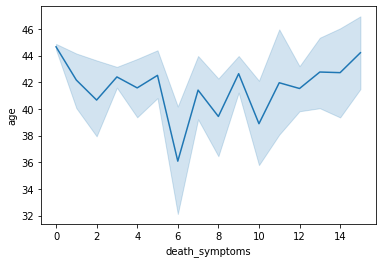

In [61]:
df = pd.read_csv('numdata.csv')
sns.lineplot(x='death_symptoms',y='age',data=df)

In [62]:
d = pd.read_csv('pred.csv')

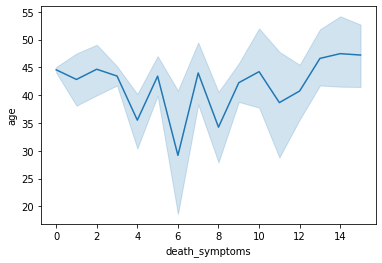

In [63]:
sns.lineplot(x='death_symptoms',y='age',data=d)

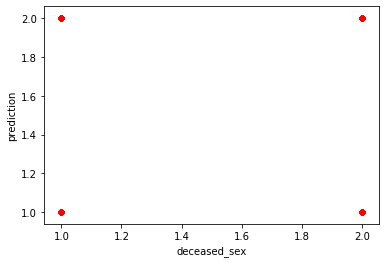

In [64]:

d.plot(kind='scatter',x='deceased_sex',y='prediction',color='red')

ValueError: Either both or neither of `x` and `y` must be specified (but try passing to `data`, which is more flexible).

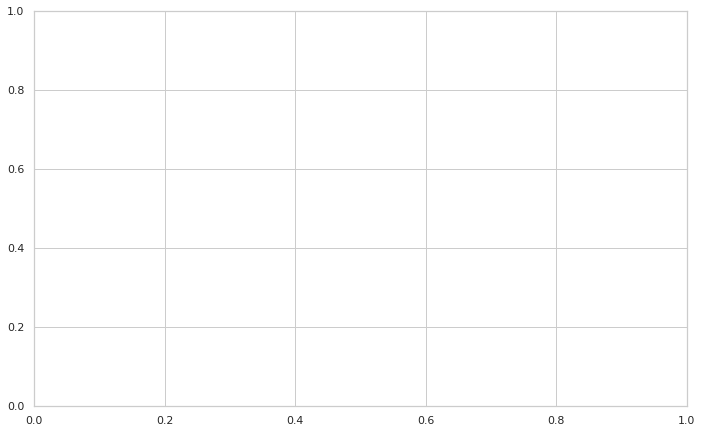

In [65]:
t = pd.read_csv('data.csv')
sns.set(style="whitegrid")
a4_dims = (11.7, 7.27)
fig, ax = plt.subplots(figsize=a4_dims)
sns.lineplot(x='year_of_death',data=t).set(xlabel='year', ylabel='no_of_deaths')

In [ ]:

t.columns

In [ ]:
sns.barplot(x='deceased_sex',y='month_of_death',data=t) 

In [ ]:
sns.set(style="whitegrid")
a4_dims = (20.7, 6.27)
fig, ax = plt.subplots(figsize=a4_dims)
sns.lineplot(x='death_symptoms',y='month_of_death',data=t,hue='deceased_sex')

In [ ]:
sns.barplot(x='death_symptoms',y='month_of_death',data=t)